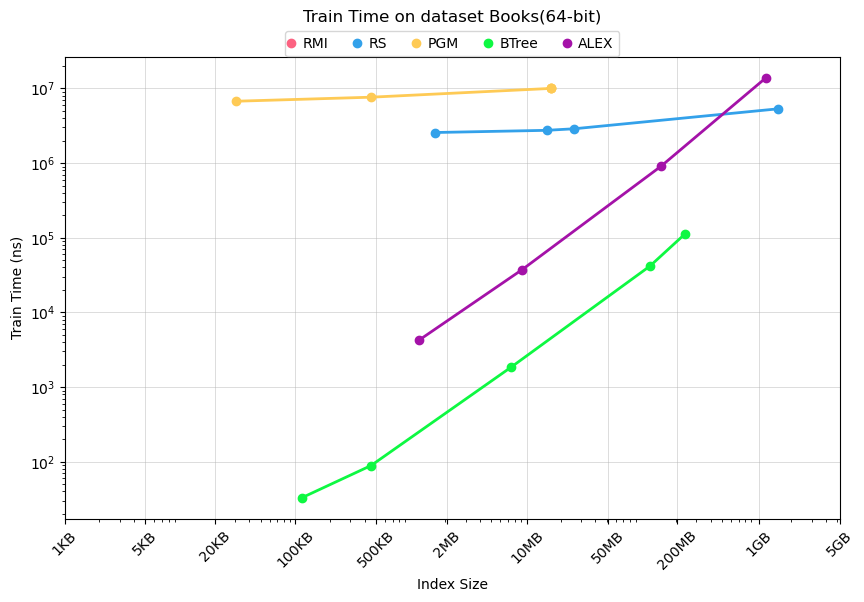

<Figure size 640x480 with 0 Axes>

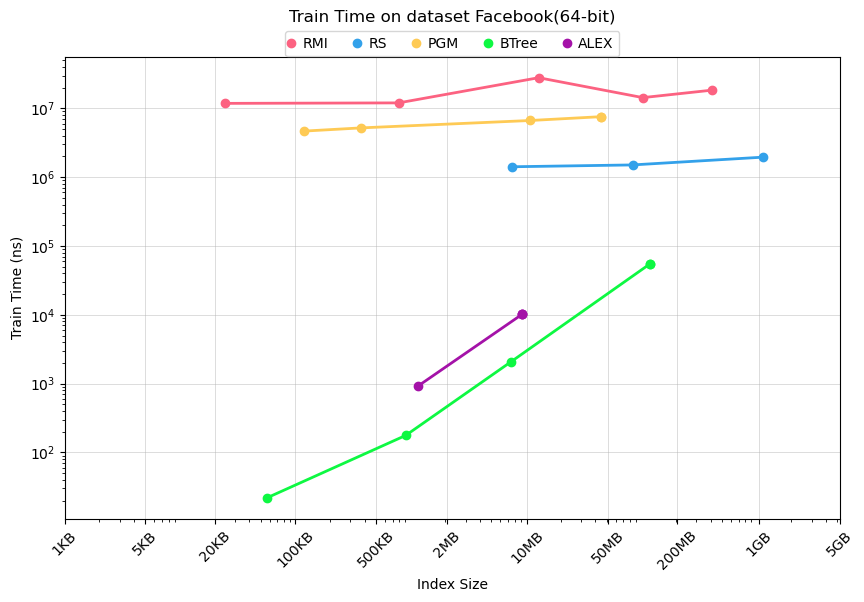

<Figure size 640x480 with 0 Axes>

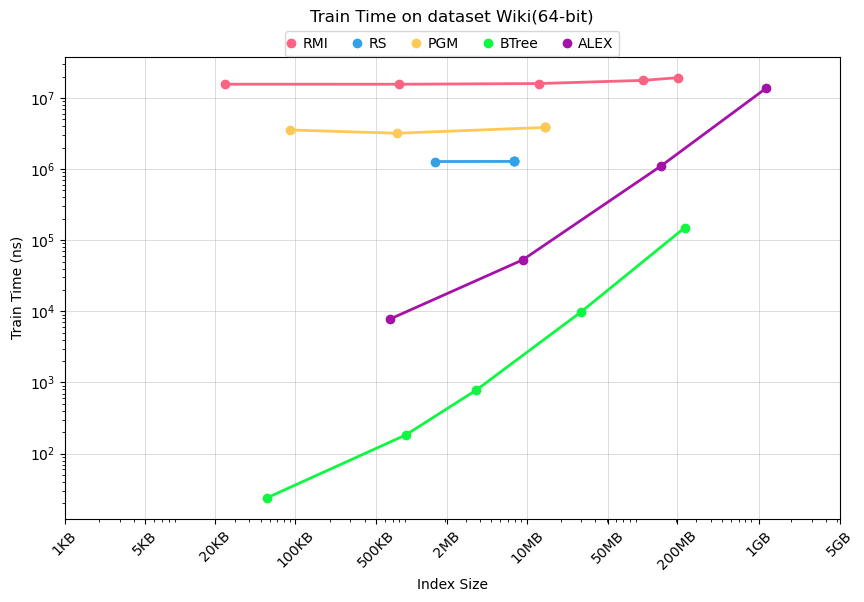

<Figure size 640x480 with 0 Axes>

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = {
    'index_type': ['ALEX', 'ALEX', 'ALEX', 'BTree', 'BTree', 'BTree', 'PGM', 'PGM', 'PGM', 'RMI', 'RMI', 'RMI', 'RS', 'RS', 'RS'],
    'size0_x': [np.nan, np.nan, np.nan, 114.11, 57.1, 57.1, 30.34, 118.52, 89.78, 24.61, 24.59, 24.61, np.nan, np.nan, np.nan],
    'size1_x': [1187.84, 1157.12, 658.34, 453.74, 906.86, 906.86, 455.7, 371.4, 754.92, 786.46, 786.45, 786.46, 1617.92, np.nan, 1628.16],
    'size2_x': [9287.68, 9216.0, 9369.6, 7424.0, 7424.0, 3717.12, 16332.8, 10895.36, 14612.48, 12881.92, 12881.92, 12881.92, 15063.04, 7536.64, 7905.28],
    'size3_x': [147578.88, 9216.0, 148326.4, 118804.48, 118804.48, 29696.0, 16332.8, 44820.48, 14612.48, 103075.84, 103075.84, 103075.84, 26245.12, 84029.44, 7905.28],
    'size4_x': [1205862.4, 9216.0, 1216348.16, 237598.72, 118804.48, 237598.72, 16332.8, 44820.48, 14612.48, 412313.6, 412313.6, 206161.92, 1520435.2, 1142947.84, 7905.28],
    'data_set': ['Books(64-bit)', 'Facebook(64-bit)', 'Wiki(64-bit)', 'Books(64-bit)', 'Facebook(64-bit)', 'Wiki(64-bit)', 'Books(64-bit)', 'Facebook(64-bit)', 'Wiki(64-bit)', 'Books(64-bit)', 'Facebook(64-bit)', 'Wiki(64-bit)', 'Books(64-bit)', 'Facebook(64-bit)', 'Wiki(64-bit)'],
    'size0_y': [np.nan, np.nan, np.nan, 33.0, 22.0, 24.0, 6739984.0, 4668898.0, 3546904.0, 0.0, 11810873.0, 15602841.0, np.nan, np.nan, np.nan],
    'size1_y': [4277.0, 921.0, 7764.0, 89.0, 177.0, 183.0, 7639012.0, 5200067.0, 3190206.0, 0.0, 12004593.0, 15585429.0, 2568828.0, np.nan, 1276625.0],
    'size2_y': [37555.0, 10124.0, 52924.0, 1847.0, 2081.0, 785.0, 10007103.0, 6659781.0, 3849149.0, 0.0, 27877710.0, 15933237.0, 2748475.0, 1416319.0, 1281195.0],
    'size3_y': [903697.0, 10124.0, 1106614.0, 41792.0, 54957.0, 9681.0, 10007103.0, 7570339.0, 3849149.0, 0.0, 14320355.0, 17651564.0, 2885196.0, 1506394.0, 1281195.0],
    'size4_y': [13930591.0, 10124.0, 13816729.0, 111537.0, 54957.0, 149819.0, 10007103.0, 7570339.0, 3849149.0, 0.0, 18398967.0, 19253928.0, 5327639.0, 1954937.0, 1281195.0]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(data)
# Define the custom ticks in bytes
custom_ticks = [
    1 ,       # 1KB
    5 ,       # 5KB
    20 ,      # 20KB
    100 ,     # 100KB
    500 ,     # 500KB
    2 * 1024**1,    # 2MB
    10 * 1024**1,   # 10MB
    50 * 1024**1,   # 50MB
    200 * 1024**1,  # 200MB
    1 * 1024**2,    # 1GB
    5 * 1024**2     # 5GB
]

# Plotting the data
datasets = df['data_set'].unique()
clolor_set={
    'RMI':'#FC6281',
    'RS':'#33A1EA',
    'PGM':'#FECA55',
    'BTree':'#0EF842',
    'ALEX':'#A412A8'
}
for dataset in datasets:
    subset = df[df['data_set'] == dataset]
    plt.figure(figsize=(10, 6))
    for index_type in ['RMI','RS','PGM','BTree','ALEX']:
        # pprint(index_type)
        sub_subset = subset[subset['index_type'] == index_type]
        sizes = sub_subset[['size0_x', 'size1_x', 'size2_x', 'size3_x', 'size4_x']].values.flatten()
        times = sub_subset[['size0_y', 'size1_y', 'size2_y', 'size3_y', 'size4_y']].values.flatten()
        
        # Remove NaN values
        mask = ~np.isnan(sizes) & ~np.isnan(times)
        sizes = sizes[mask]
        times = times[mask]
        
        # plt.scatter(sizes, times, label=index_type)
        plt.plot(sizes, times, color=clolor_set[index_type], marker="o", markerfacecolor=None,markeredgewidth=1,linewidth=2 , label=index_type)
    
    plt.xlabel('Index Size')
    plt.ylabel('Train Time (ns)')
    plt.title(f'Train Time on dataset {dataset}',pad=25)
    plt.xscale('log')
    plt.yscale('log')
    plt.xticks(custom_ticks, ['1KB', '5KB', '20KB', '100KB', '500KB', '2MB', '10MB', '50MB', '200MB', '1GB', '5GB'], rotation=45)

    plt.legend(handlelength=0.1,loc=9, bbox_to_anchor=(0.25, 0.57, 0.5, 0.5),ncol=5)
    plt.grid(True, which="major", ls="-",ms=0.2, linewidth=0.5,alpha=0.6)
    # plt.tight_layout()
    plt.show()
    plt.savefig('books_read.png')